<b>Baseball case study</b>

This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success.There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

<li>Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts,Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, and Errors.</li>

<li>Output: Number of predicted wins (W)</li>

<li>General Approach: For predicting the number of wins a baseball team will attain -- based on the given input features, a linear regression approach is neccessary. </li>

Dataset: https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/blob/master/baseball.csv

<b>Importing Necessary Libraries</b>

In [191]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [229]:
# Reading the data
base_data= pd.read_csv("baseball.csv")
base_data.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [230]:
base_data.tail()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
25,92,667,5385,1346,263,26,187,563,1258,59,595,553,3.44,6,21,47,75
26,84,696,5565,1486,288,39,136,457,1159,93,627,597,3.72,7,18,41,78
27,79,720,5649,1494,289,48,154,490,1312,132,713,659,4.04,1,12,44,86
28,74,650,5457,1324,260,36,148,426,1327,82,731,655,4.09,1,6,41,92
29,68,737,5572,1479,274,49,186,388,1283,97,844,799,5.04,4,4,36,95


In [231]:
base_data.shape

(30, 17)

There are 30 rows and 17 columns.

In [154]:
base_data.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

There are more attributes(16) with int datatype except attribute(ERA) is of float datatype.

In [16]:
base_data.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


<b>Observations:</b>
<li> For some of columns, Mean is greater than Median.</li>
<li> The Minimum Wins is 63 and Maximum is 100.</li>

<b>Checking Missing Value in the dataset</b>

In [8]:
base_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
W      30 non-null int64
R      30 non-null int64
AB     30 non-null int64
H      30 non-null int64
2B     30 non-null int64
3B     30 non-null int64
HR     30 non-null int64
BB     30 non-null int64
SO     30 non-null int64
SB     30 non-null int64
RA     30 non-null int64
ER     30 non-null int64
ERA    30 non-null float64
CG     30 non-null int64
SHO    30 non-null int64
SV     30 non-null int64
E      30 non-null int64
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [7]:
base_data.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

There is no Missing value in the dataset.

<b>Exploratory Data Analysis</b>

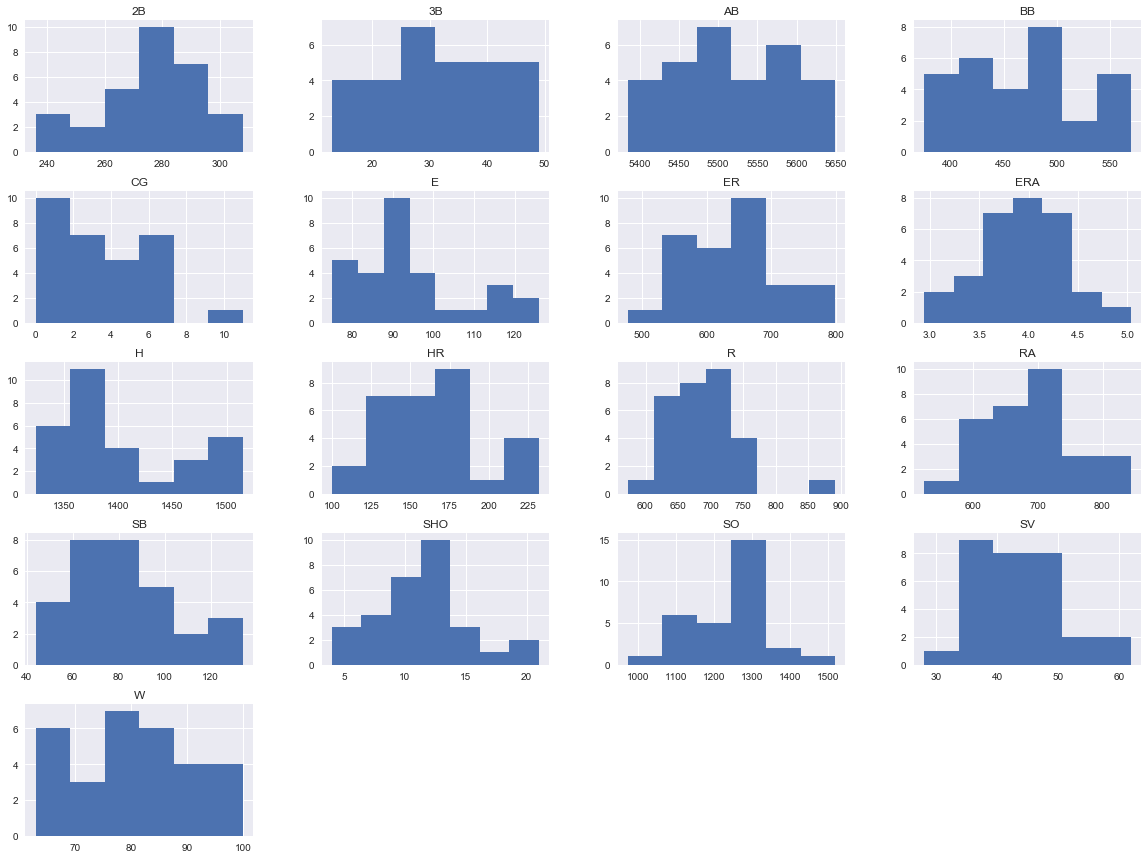

In [13]:
# Data Distribution 
base_data.hist(figsize=(20,15),bins="auto");

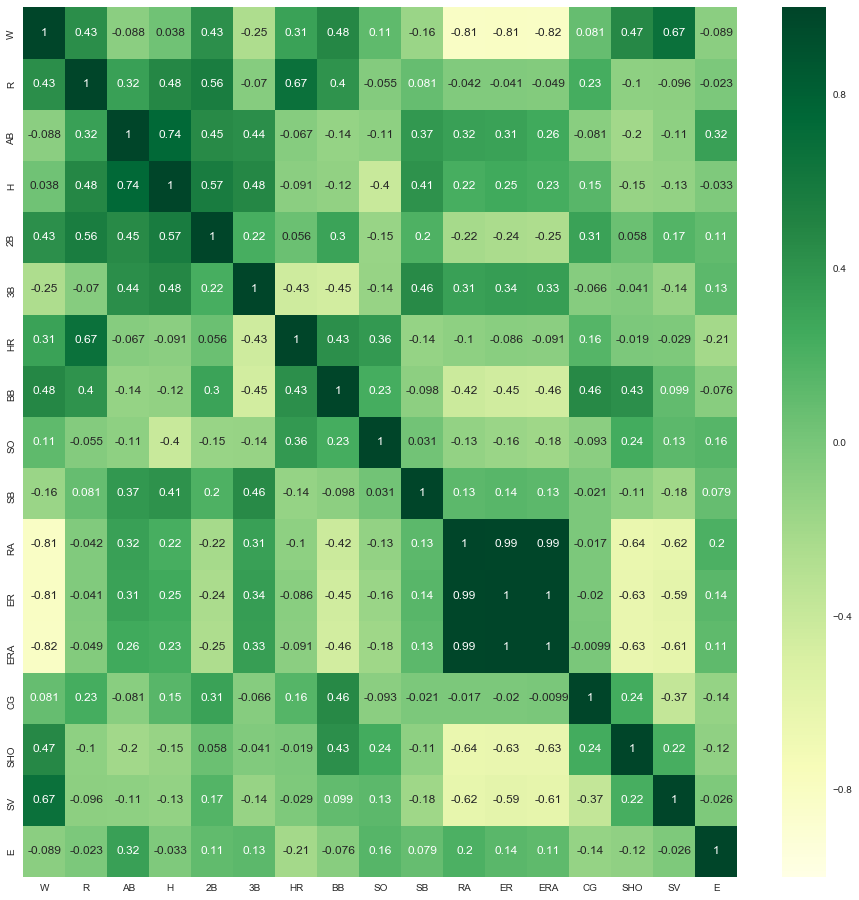

In [20]:
heatmap=base_data.corr()
plt.figure(figsize=(16,16))
sns.heatmap(heatmap, cmap="YlGn",annot=True)

<b>Observations:</b>
<li> HR and R are strongly correlated. Similary H and AB, RA and ER are also correlated.</li>

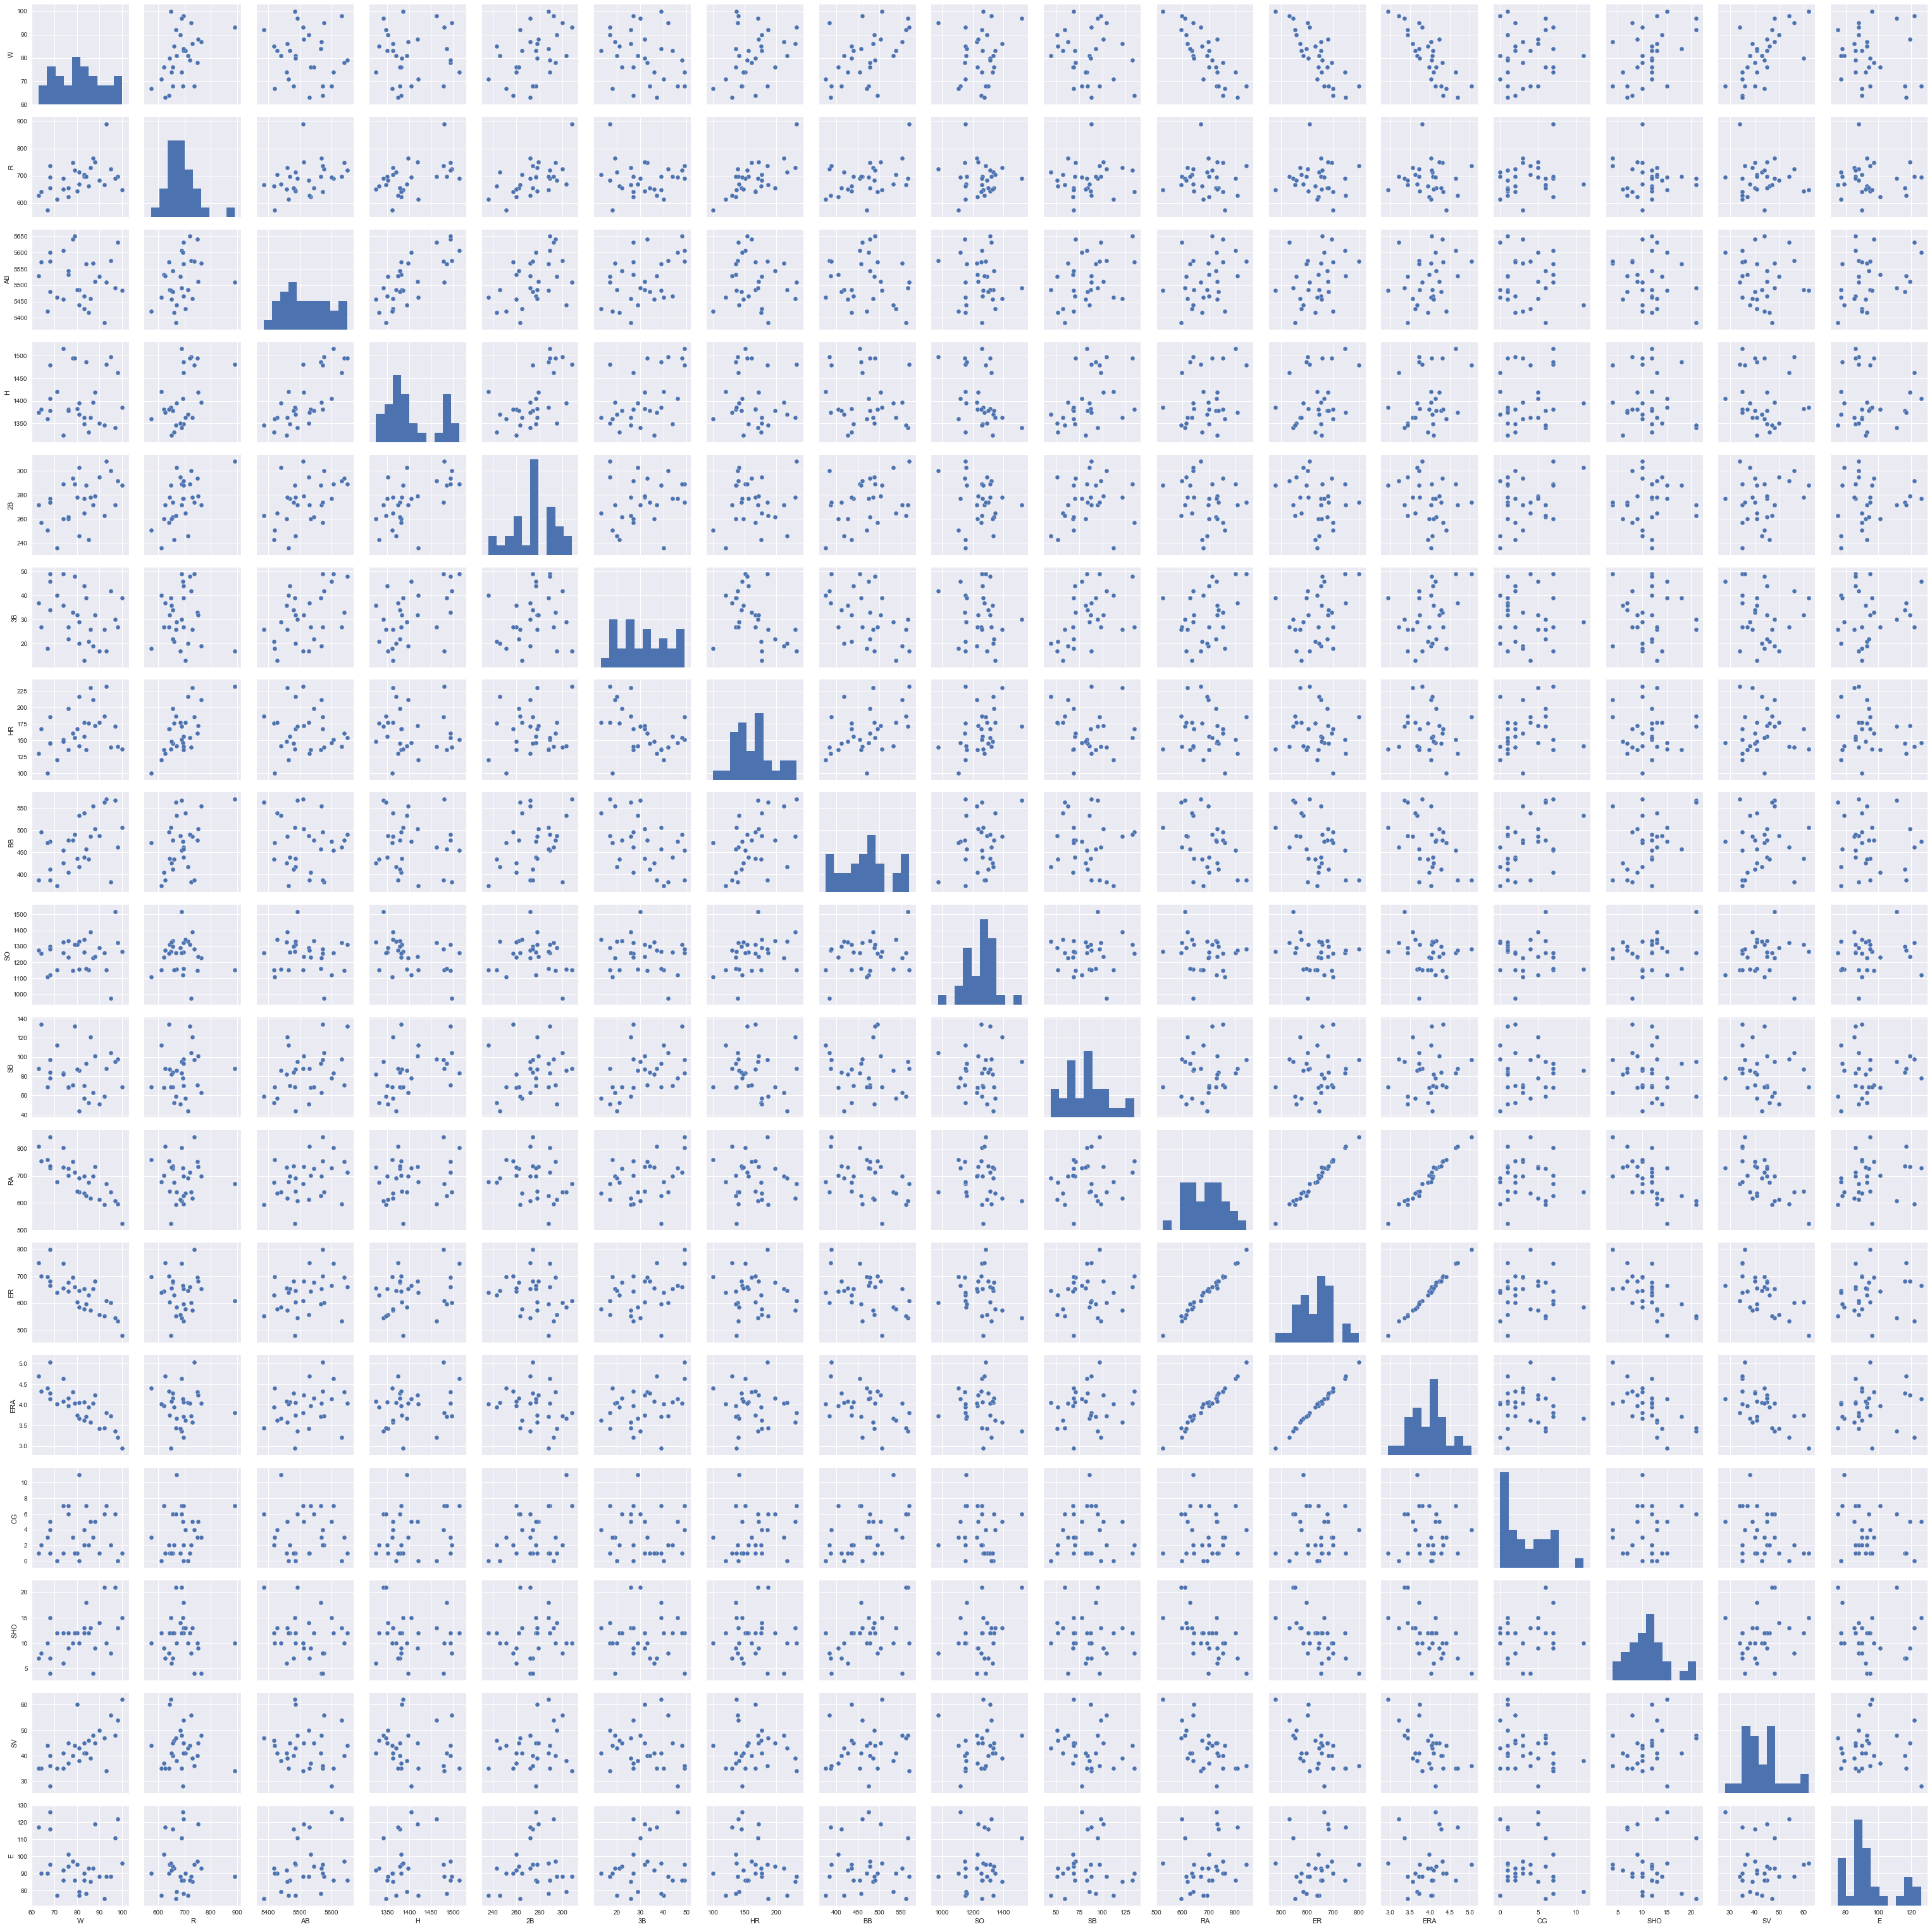

In [232]:
sns.pairplot(base_data)

<b>Checking Outliers</b>

In [233]:
from scipy.stats import zscore
z_score=abs(zscore(base_data))
print("The shape of dataset before removing outliers",base_data.shape)
base_data=base_data.loc[(z_score<3).all(axis=1)]
print("The shape of dataset after removing outliers",base_data.shape)

The shape of dataset before removing outliers (30, 17)
The shape of dataset after removing outliers (29, 17)


<b>Checking Skewness</b>

In [234]:
base_data.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.783772
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG     0.854980
SHO    0.526943
SV     0.627480
E      0.840271
dtype: float64

In [235]:
# Treating the skewness in the dataset
import warnings
warnings.filterwarnings("ignore")
for index in base_data.skew().index:
    if base_data.skew().loc[index]>0.5:
        base_data[index]=np.sqrt(base_data[index])

In [236]:
base_data.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.761274
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG    -0.260678
SHO   -0.085802
SV     0.370280
E      0.714966
dtype: float64

<b>Splitting the dataset into input and output variables</b>

In [237]:
X= base_data.drop("W",axis=1)
y= base_data[["W"]]

In [238]:
# we will use StandardScaler to bring the features into same scale
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X= scaler.fit_transform(X)

<b>Splitting the dataset into Training and Testing into (70:30) ratio</b>

In [239]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.30)

In [240]:
# We are using R2 score to evaluate
from sklearn.metrics import r2_score
def m_r2_score(cm,X,y):
    m_r2_score=0
    for r_state in range(42,100):
        X_train,X_test, y_train, y_test= train_test_split(X,y,test_size=0.30, random_state=r_state)
        cm.fit(X_train,y_train)
        y_pred= cm.predict(X_test)
        score=r2_score(y_test,y_pred)
        if score>m_r2_score:
            m_r2_score=score
            final_r2_score=r_state
    print("Maximum R2_Score corresponding:",final_r2_score," and it is :",round((m_r2_score),3))

# Machine Learning Models

As the target variable(Wins) is continuous, we are using Linear Regression,Support Vector Machine Regressor, Random Forest Regressor and Gradient Boosting Regressor.

<b>Linear Regression</b>

In [241]:
from sklearn.linear_model import LinearRegression
L_r=LinearRegression()
m_r2_score(L_r,X,y)

Maximum R2_Score corresponding: 62  and it is : 0.801


In [242]:
from sklearn.model_selection import GridSearchCV
parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
L_r= GridSearchCV(L_r,parameters, cv=5)
L_r.fit(X,y)
L_r.best_params_

{'copy_X': True, 'fit_intercept': True, 'normalize': False}

In [243]:
L_r=LinearRegression(copy_X=True,fit_intercept=True,normalize=False)
m_r2_score(L_r,X,y)

Maximum R2_Score corresponding: 62  and it is : 0.801


In [244]:
pred_linr= L_r.predict(X_test)
lr1= L_r.score(X_test, y_test)
print("The accuracy of the Linear Regression Model is:",round((lr1),3))

The accuracy of the Linear Regression Model is: 0.775


In [245]:
# Cross validation score
from sklearn.model_selection import cross_val_score
m_linr=cross_val_score(L_r,X,y,cv=10,scoring="r2").mean()
print("Mean R2 Score for Linear Regression:",m_linr)
std_linr=cross_val_score(L_r,X,y,cv=10,scoring="r2").std()
print("Standard Deviation in R2 Score for Linear Regression:",std_linr)

Mean R2 Score for Linear Regression: -2.8202076747022415
Standard Deviation in R2 Score for Linear Regression: 6.270734644735675


In [246]:
# RMSE
from sklearn import metrics
l_rmse=np.sqrt(metrics.mean_squared_error(y_test,pred_linr))
l_rmse

5.185059842779297

<b>Random Forest Regressor</b>

In [247]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
param_grid = {
    'max_depth': [80, 100],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 5],
    'min_samples_split': [10, 12],
    'n_estimators': [100, 500]
}
rfr= GridSearchCV(rfr, param_grid,cv=5)
rfr.fit(X,y)
rfr.best_params_

{'max_depth': 80,
 'max_features': 3,
 'min_samples_leaf': 5,
 'min_samples_split': 10,
 'n_estimators': 500}

In [267]:
rfr=RandomForestRegressor(max_depth=80,max_features=3,min_samples_leaf=5,min_samples_split=10,n_estimators=500)
m_r2_score(rfr,X,y)

Maximum R2_Score corresponding: 71  and it is : 0.593


In [268]:
pred_rf= rfr.predict(X_test)
rf1= rfr.score(X_test, y_test)
print("The accuracy of the Random Forest Regressor Model is:",round((rf1),3))

The accuracy of the Random Forest Regressor Model is: 0.43


In [269]:
# Cross validation score
from sklearn.model_selection import cross_val_score
m_rfr=cross_val_score(rfr,X,y,cv=10,scoring="r2").mean()
print("Mean R2 Score for Random Forest Regressor:",m_rfr)
std_rfr=cross_val_score(rfr,X,y,cv=10,scoring="r2").std()
print("Standard Deviation in R2 Score for Random Forest Regression:",std_rfr)

Mean R2 Score for Random Forest Regressor: -5.142693803374337
Standard Deviation in R2 Score for Random Forest Regression: 8.908421242099024


In [270]:
# RMSE
from sklearn import metrics
r_rmse=np.sqrt(metrics.mean_squared_error(y_test,pred_rf))
r_rmse

8.246494232326684

<b>Gradient Boosting Regressor</b>

In [252]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor()
parameters= {'learning_rate': [0.01, 0.02,0.09], 'subsample': [0.9, 0.5,0.6], 'n_estimators': [50,100,500], 'max_depth': [4,6,8]}
gb= GridSearchCV(estimator=gb, param_grid= parameters, cv=5, n_jobs=-1)
gb.fit(X,y)
gb.best_params_

{'learning_rate': 0.02, 'max_depth': 4, 'n_estimators': 100, 'subsample': 0.6}

In [253]:
gb = GradientBoostingRegressor(learning_rate=0.09,max_depth=6,n_estimators=50,subsample=0.5)
m_r2_score(gb,X,y)

Maximum R2_Score corresponding: 78  and it is : 0.825


In [254]:
pred_gbr= gb.predict(X_test)
gb1= gb.score(X_test, y_test)
print("The accuracy of the Gradient Boosting Regressor Model is:",round((gb1),3))

The accuracy of the Gradient Boosting Regressor Model is: 0.904


In [255]:
# Cross validation score
from sklearn.model_selection import cross_val_score
m_gb=cross_val_score(gb,X,y,cv=10,scoring="r2").mean()
print("Mean R2 Score for Gradient Boosting Regressor:",m_gb)
std_gb=cross_val_score(gb,X,y,cv=10,scoring="r2").std()
print("Standard Deviation in R2 Score for Gradient Boosting Regression:",std_gb)

Mean R2 Score for Gradient Boosting Regressor: -5.468764931270693
Standard Deviation in R2 Score for Gradient Boosting Regression: 11.725025084277727


In [256]:
# RMSE
from sklearn import metrics
gb_rmse=np.sqrt(metrics.mean_squared_error(y_test,pred_gbr))
gb_rmse

3.3809079668577895

<b>XG Boost Regressor</b>

In [257]:
import xgboost as xgb
xg_reg= xgb.XGBRegressor(objective="reg:linear",silent=True)
xg_reg.fit(X,y)
m_r2_score(xg_reg,X,y)

Maximum R2_Score corresponding: 54  and it is : 0.805


In [258]:
pred_xr= xg_reg.predict(X_test)
xg1= xg_reg.score(X_test, y_test)
print("The accuracy of the XG BoostRegressor Model is:",round((xg1),3))

The accuracy of the XG BoostRegressor Model is: 0.87


In [275]:
# Cross validation score
from sklearn.model_selection import cross_val_score
m_xg=cross_val_score(xg_reg,X,y,cv=10,scoring="r2").mean()
print("Mean R2 Score for XG Boost Regressor:",m_xg)
std_xg=cross_val_score(xg_reg,X,y,cv=10,scoring="r2").std()
print("Standard Deviation in R2 Score for XG Boost Regressor:",std_xg)

Mean R2 Score for XG Boost Regressor: -9.597079805656701
Standard Deviation in R2 Score for XG Boost Regressor: 19.28040451502056


In [276]:
# RMSE
from sklearn import metrics
xg_rmse=np.sqrt(metrics.mean_squared_error(y_test,pred_xr))
xg_rmse

3.9443844615213983

<b>Bagging Regressor</b>

In [261]:
from sklearn.ensemble import BaggingRegressor
bgcl = BaggingRegressor(n_estimators=100, oob_score= True)
bgcl = bgcl.fit(X,y)
m_r2_score(bgcl,X,y)

Maximum R2_Score corresponding: 70  and it is : 0.793


In [262]:
pred_bg= bgcl.predict(X_test)
br1= bgcl.score(X_test, y_test)
print("The accuracy of the Bagging Regressor Model is:",round((br1),3))

The accuracy of the Bagging Regressor Model is: 0.771


In [263]:
# Cross validation score
from sklearn.model_selection import cross_val_score
m_br=cross_val_score(xg_reg,X,y,cv=10,scoring="r2").mean()
print("Mean R2 Score for Bagging Regressor:",m_br)
std_br=cross_val_score(xg_reg,X,y,cv=10,scoring="r2").std()
print("Standard Deviation in R2 Score for Bagging Regressor:",std_br)

Mean R2 Score for Bagging Regressor: -9.597079805656701
Standard Deviation in R2 Score for Bagging Regressor: 19.28040451502056


In [264]:
# RMSE
from sklearn import metrics
br_rmse=np.sqrt(metrics.mean_squared_error(y_test,pred_bg))
br_rmse

5.231189582154755

# Evaluation:

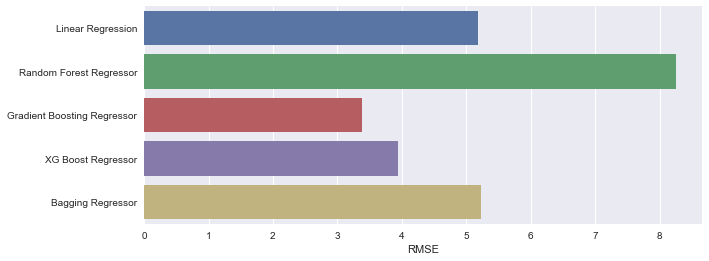

In [277]:
list_scores=[l_rmse,r_rmse,gb_rmse,xg_rmse,br_rmse]
list_regressors=["Linear Regression","Random Forest Regressor", "Gradient Boosting Regressor","XG Boost Regressor","Bagging Regressor"]

fig,ax= plt.subplots()
fig.set_size_inches(10,4)
ax=sns.barplot(y=list_regressors, x=list_scores,ax=ax)
plt.xlabel("RMSE")
plt.show()

In [278]:
#Lets initialise the data frame with columns model and RMSE 
res= [["Linear Regression",lr1,l_rmse],["Random Forest Regressor", rf1,r_rmse],["Gradient Boosting Regressor", gb1,gb_rmse],["XG Boost Regressor",xg1,xg_rmse],["Bagging Regressor",br1,br_rmse]]
comparsion= pd.DataFrame(res, columns=["Model Name", "Accuracy","RMSE"], index=[1,2,3,4,5])
comparsion

,Model Name,Accuracy,RMSE
1,Linear Regression,0.774755,5.185060
2,Random Forest Regressor,0.430246,8.246494
3,Gradient Boosting Regressor,0.904233,3.380908
4,XG Boost Regressor,0.869651,3.944384
5,Bagging Regressor,0.770729,5.231190


<b>Observations:</b>
<li> As the target variable(W) is numerical, we have calculated R2 Score and evaluated RMSE for the performance of the models.</li>
<li>From the above Model Evaluation, we can see that Gradient Boosting Regressor performed well (90.4%) with lowest RMSE (3.380908).</li>

<b>Saving the Prediction</b>

As Gradient Boosting Regressor performed well. We are saving the prediction.

In [272]:
np.savetxt('Model7.csv',pred_gbr,delimiter=',')

In [273]:
#Lets save the above model
from sklearn.externals import joblib 
  
# Save the model as a pickle in a file 
joblib.dump(gb, 'project7.pkl')

['project7.pkl']